# Analysis of the autism data

In [19]:
run init.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done.


# Init.

In [20]:
from autismDataset import Dataset

df = pd.read_csv("/home01/sam/df_all.csv")
#df = pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")
data = Dataset(df=df, 
               missing_data_handling='encoding', 
               imputation_method='without', 
               sampling_method='vanilla',
               scenario='asd_td_age_matched_n_balanced',
               proportion_train=1)


Removing 149/2298 incomplete administrations.
Removing 953/2149 keeping first admin.
Removing 77/1196 keeping only subject with diagnosis: [0, 1].
Removing 389/1119 keeping only subject with age between 10 and 60 mo.
Removing 493/730 to match age. (removed diagnosis group : 0).
237 administrations left.


,id
diagnosis,
0.0,123
1.0,114


Splitting dataset into test and train set.
Encoding 237 (train) and 0 (test) missing values with -5.
Upampling minority class. Imbalance ratio of: 0.93 to 1.00
Predicting diagnosis based on 40 features


In [21]:
from autismDataset import Dataset

df = pd.read_csv("/home01/sam/df_all.csv")
#df = pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")
data = Dataset(df=df, 
               missing_data_handling='encoding', 
               imputation_method='without', 
               sampling_method='vanilla',
               scenario='asd_td_age_matched_n_balanced',
               proportion_train=1)

exp = Experiments(data.dataset_name,
                  dataset=data, 
                approach='LogisticRegression', 
                proportion_train=PROPORTION_TRAIN, 
                resolution=RESOLUTION, 
                bandwidth=BANDWIDTH, 
                previous_experiment=None,        
                verbosity=1, 
                debug=True, 
                save_experiment=False)

exp.fit_predict(num_cv=16)
exp.plot()

Encoding 237 (train) and 0 (test) missing values with -5.


,Accuracy,F1 score (2 PPVxTPR/(PPV+TPR)),Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.781,0.774,0.561,0.781,0.78,0.767,0.793,0.219,0.233,0.207


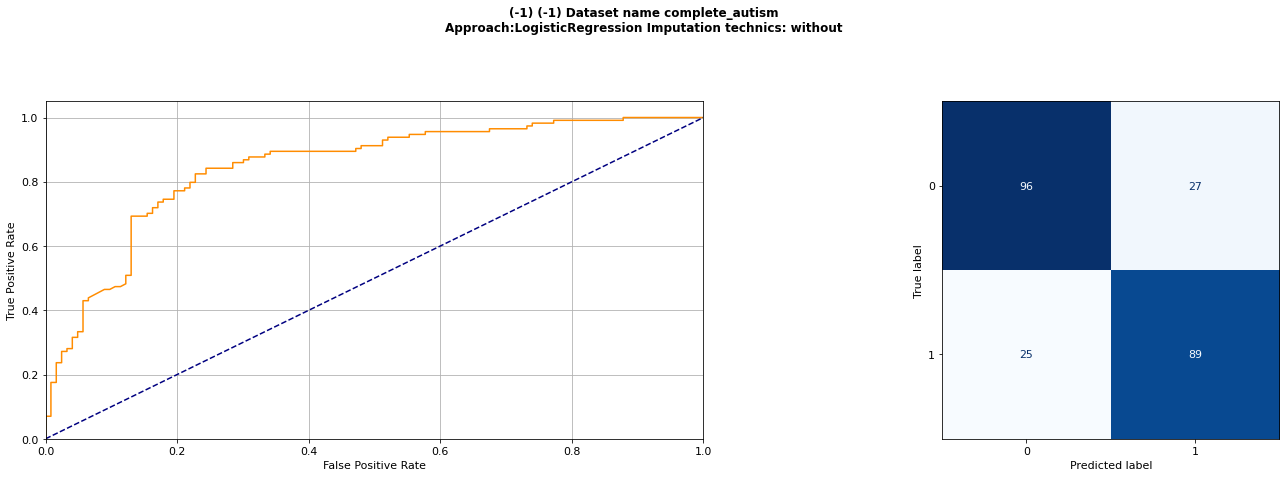

Not implemented yet.


In [22]:
exp.fit_predict(num_cv=16)
exp.plot()

# Description

In [7]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df[['diagnosis', 'language', 'app_version', 'features_extracted', 'face_tracking', 'age',
    'sex', 'ethnicity', 'race', 'primary_education',
    'mullen_el', 'mullen_fm', 'mullen_rl', 'mullen_vr',
       'mullen_elc_std', 'ados_total', 'ados_rrb', 'ados_sa',
       'srs_total_tscore', 'srs_social_awareness_tscore',
       'srs_social_motivation_tscore', 'cbcl_scaleIV_score',
       'cbcl_asd_score', 'mchat_total', 'mchat_final', 'mchat_result',
       'BB_gaze_percent_right', 'BB_gaze_silhouette_score',
       'S_gaze_percent_right', 'S_gaze_silhouette_score',
       'FP_gaze_speech_correlation', 'FP_gaze_silhouette_score',
       'proportion_of_name_call_responses',
       'average_response_to_name_delay', 'FB_postural_sway',
       'number_of_touches',
       'average_length', 'std_length', 'average_error', 'std_error',
       'number_of_target', 'pop_rate', 'average_touch_duration',
       'std_touch_duration', 'average_delay_to_pop', 'std_delay_to_pop',
       'average_force_applied', 'std_force_applied',
       'average_accuracy_variation', 'accuracy_consistency',
       'average_touches_per_target', 'std_touches_per_target',
       'average_time_spent', 'std_time_spent', 'exploratory_percentage',
       'administration_number', 'S_postural_sway', 'NS_postural_sway',
       'gaze_silhouette_score', 'inv_S_gaze_percent_right',
       'mean_gaze_percent_right']], title="Pandas Profiling Report")


profile.to_file("./autism_report_df.html")


ModuleNotFoundError: No module named 'pandas_profiling'

In [20]:
def select(data,feature,value,unique=False):
    """Example : select(data,'ASD+',1,unique=True)
                 select(data,'sex','Male')
    """
    if unique:
        data_unique=data.drop_duplicates(subset = "id",keep='first')
        selected_data = data_unique[data_unique[feature]==value]
    else:
        selected_data = data[data[feature]==value]
    return(selected_data)

Predicting diagnosis based on 40 features

**********************************
 statistics:

**********************************
1220 subjects 
697  male
523  female
0  unknown sex beacause of missing clinical data 


**********************************
192 subjects in the ASD group
136 number of male
56 number of female 
 

**********************************
950 subjects in the TD group
502 number of male
448 number of female 


**********************************
29 subjects in the DL/DD group
21 number of male
8 number of female 


**********************************
49 subjects in the ADHD group
38 number of male
38 number of female 



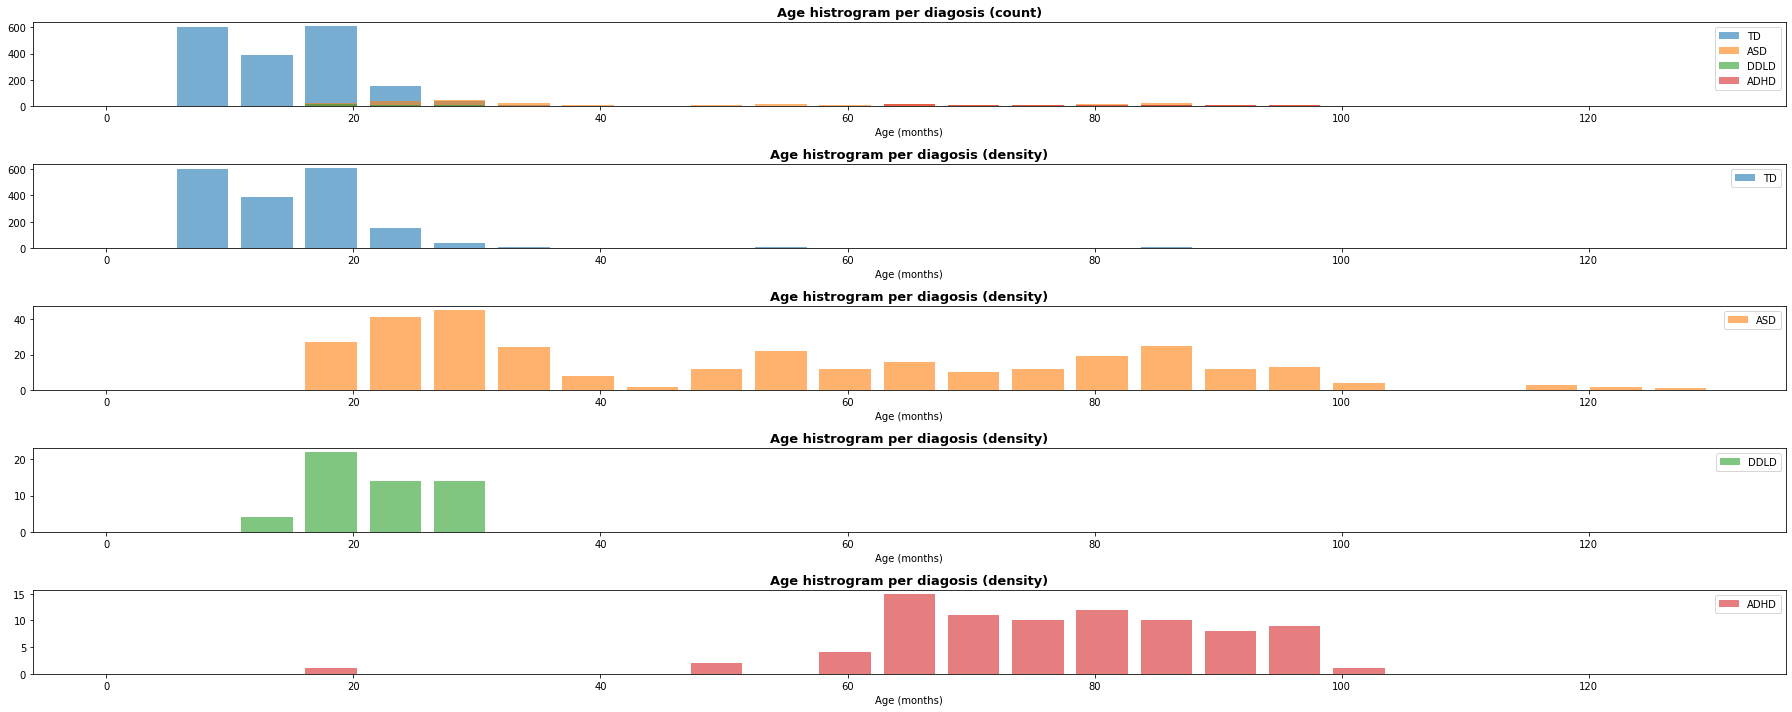

In [54]:
df = pd.read_csv("/home01/sam/df_all.csv")

data = Dataset(df=df, 
               missing_data_handling='encoding', 
               imputation_method='without', 
               proportion_train=1)

DIAG_DICT = {'TD':0., 
            'ASD':1., 
            'DDLD':2., 
            'ADHD':3.}
DIAG_DICT_REVERSE = {v: k for k, v in DIAG_DICT.items()}

colors = {'TD':'#1f77b4',
          'ASD': '#ff7f0e',
          'DDLD':'#2ca02c',
          'ADHD':'#d62728',
          'comorbid':'#9467bd'}
           
    
fig, axes = plt.subplots(5, 1, figsize=(25, 10)); axes=axes.flatten()

for i, d in df.groupby('diagnosis'):
    axes[0].hist(d['age'], bins=np.linspace(0, 130, 26), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[i]], label=DIAG_DICT_REVERSE[i])
axes[0].legend(); axes[0].set_title("Age histrogram per diagosis (count)", weight='bold', fontsize=13); axes[0].set_xlabel("Age (months)")

for i, d in df.groupby('diagnosis'):
    axes[int(i+1)].hist(d['age'], bins=np.linspace(0, 130, 26), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[i]], label=DIAG_DICT_REVERSE[i])
    axes[int(i+1)].legend(); axes[int(i+1)].set_title("Age histrogram per diagosis (density)", weight='bold', fontsize=13);axes[int(i+1)].set_xlabel("Age (months)")
plt.tight_layout()


"""
    Print population statistics at the beginning of the notebook.
"""
print('\n**********************************')
print(' statistics:')
print('\n**********************************')
data = df
# Masks
data_unique=data.drop_duplicates(subset = "id",keep='first')
data_unique_asd = select(data,'diagnosis',1,True)
data_unique_nasd = select(data,'diagnosis',0,True)
data_male = select(data,'sex',0)
data_female = select(data,'sex',1)
data_asd = select(data,'diagnosis',1)
data_nasd = select(data,'diagnosis',0)


#Count the number of subjects
subjects_id = np.unique(data['id'])
number_of_subjects = len(subjects_id)

subject_male = np.sum(data_unique['sex']==0)
subject_female = np.sum(data_unique['sex']==1)
subject_unknown = np.sum(pd.isna(data_unique['sex']))

print('{} subjects '.format(number_of_subjects))
print('{}  male'.format(subject_male))
print('{}  female'.format(subject_female)) 
print('{}  unknown sex beacause of missing clinical data \n'.format(subject_unknown)) 

# mchat_total_1_positive=data_unique.loc[data_unique['clinical_mchat_total_score']>=3]
# mchat_final_1_positive = mchat_total_1_positive.loc[mchat_total_1_positive['clinical_final_mchat_score']>=2]    
# mchat_total_2_positive=data_unique.loc[data_unique['clinical_mchat_total_score2']>=3]
# mchat_final_2_positive = mchat_total_1_positive.loc[mchat_total_1_positive['clinical_final_mchat_score2']>=2]    

# print('\n**********************************')
# print('{} subjects are "mchat positive" (First Adminisstration) '.format(len(mchat_final_1_positive)))
# print('{} subjects are "mchat positive" (Second Adminisstration) '.format(len(mchat_final_2_positive)))


nasd_subjects_id = data_unique_nasd[['id','sex']]
nasd_subject_male = np.sum(data_unique_nasd['sex']==0)
nasd_subject_female = np.sum(data_unique_nasd['sex']==1)

asd_subjects_id = data_unique_asd[['id','sex']]
asd_subject_male = np.sum(data_unique_asd['sex']==0)
asd_subject_female = np.sum(data_unique_asd['sex']==1)

dd_subjects_id = select(data_unique,'diagnosis', 2)[['id','sex']]
dd_subject_male = np.sum(dd_subjects_id['sex']==0)
dd_subject_female = np.sum(dd_subjects_id['sex']==1)

adhd_subjects_id = select(data_unique,'diagnosis', 3)[['id','sex']]
adhd_subject_male = np.sum(adhd_subjects_id['sex']==0)
adhd_subject_female = np.sum(adhd_subjects_id['sex']==1)

print('\n**********************************')
print('{} subjects in the ASD group'.format(len(asd_subjects_id)))
print('{} number of male'.format(asd_subject_male))
print('{} number of female \n '.format(asd_subject_female)) 


print('\n**********************************')
print('{} subjects in the TD group'.format(len(nasd_subjects_id)))
print('{} number of male'.format(nasd_subject_male))
print('{} number of female \n'.format(nasd_subject_female)) 



print('\n**********************************')
print('{} subjects in the DL/DD group'.format(len(dd_subjects_id)))
print('{} number of male'.format(dd_subject_male))
print('{} number of female \n'.format(dd_subject_female)) 

print('\n**********************************')
print('{} subjects in the ADHD group'.format(len(adhd_subjects_id)))
print('{} number of male'.format(adhd_subject_male))
print('{} number of female \n'.format(adhd_subject_male)) 

In [81]:
import missingno as msno

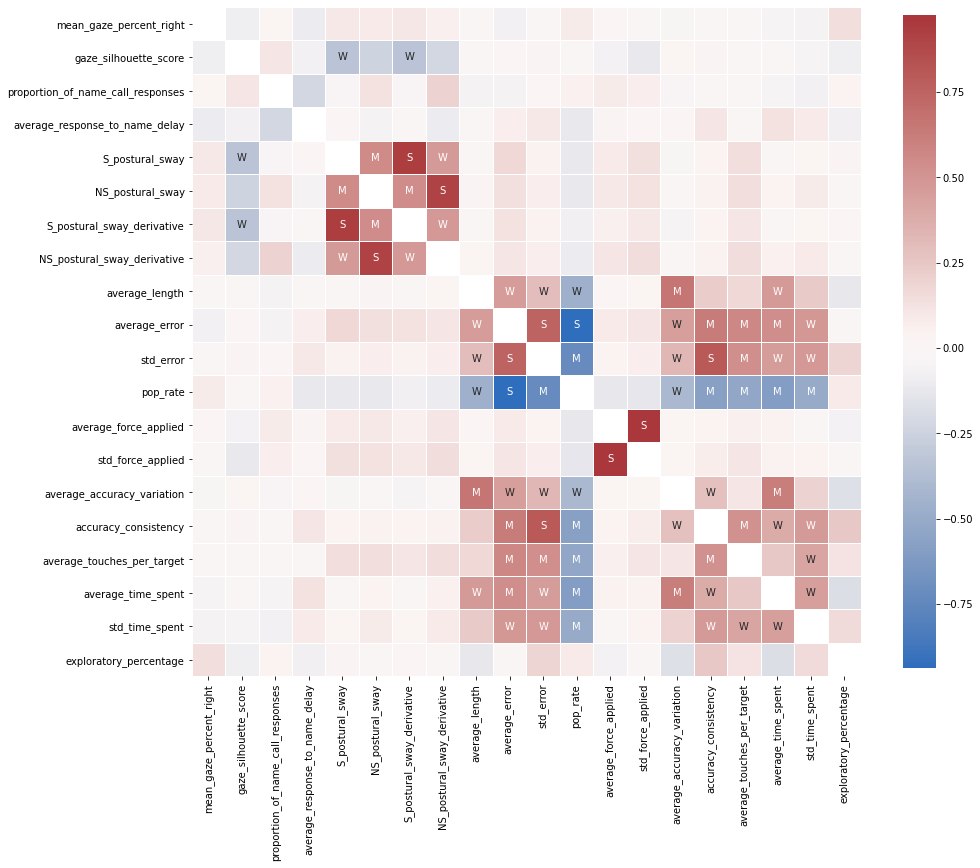

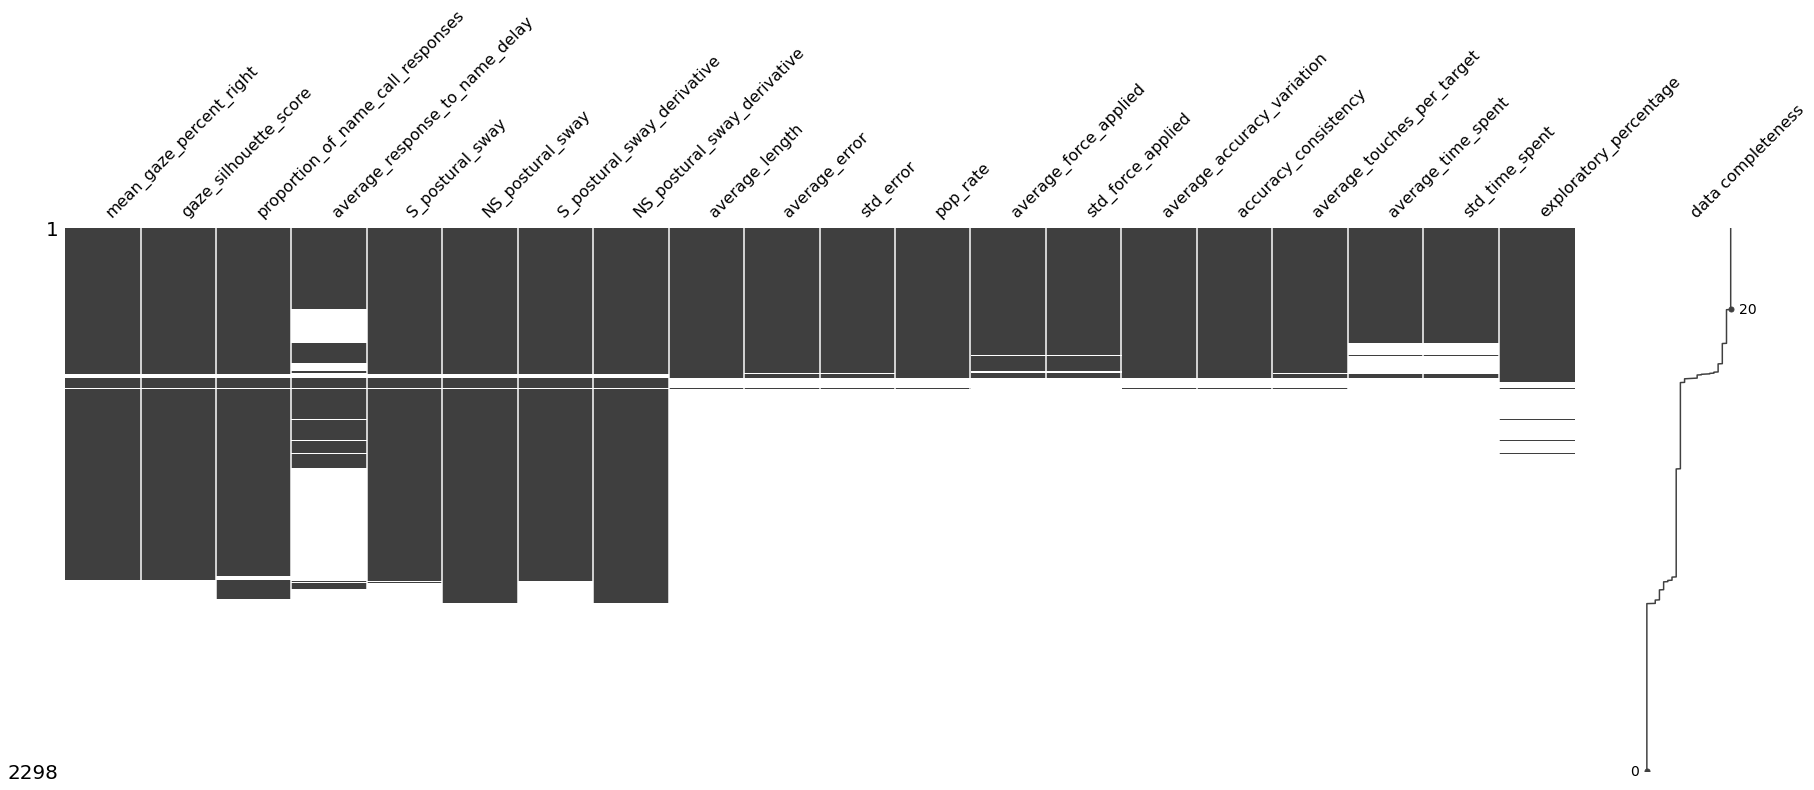

In [89]:
df_X = df[data.features_name[:int(len(data.features_name)//2)]]
# Computes feature correlation
df_corr = df_X.corr(method="pearson")

labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});


msno.matrix(df_X, labels=True, sort="descending", figsize=(30, 10));

In [102]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

pop_rate                     average_error           -0.936662
                             std_error               -0.723631
average_time_spent           pop_rate                -0.593849
accuracy_consistency         pop_rate                -0.582379
average_touches_per_target   pop_rate                -0.532550
                                                        ...   
std_error                    average_error            0.756120
accuracy_consistency         std_error                0.801857
NS_postural_sway_derivative  NS_postural_sway         0.912165
S_postural_sway_derivative   S_postural_sway          0.935392
std_force_applied            average_force_applied    0.973714
Length: 190, dtype: float64

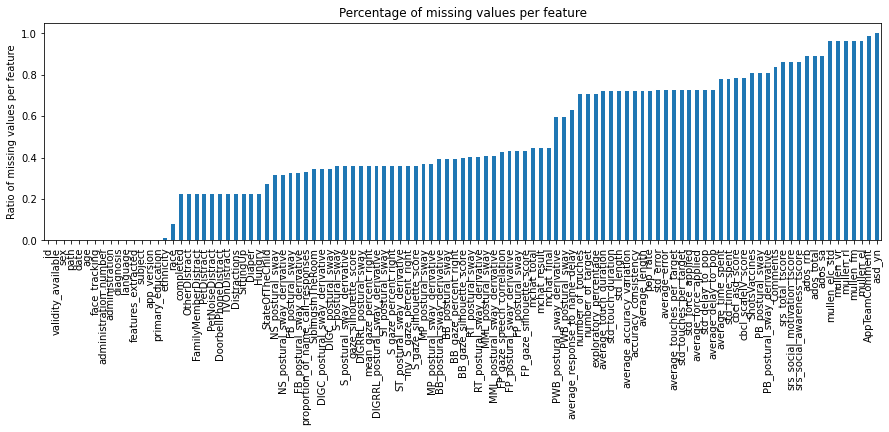

In [85]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

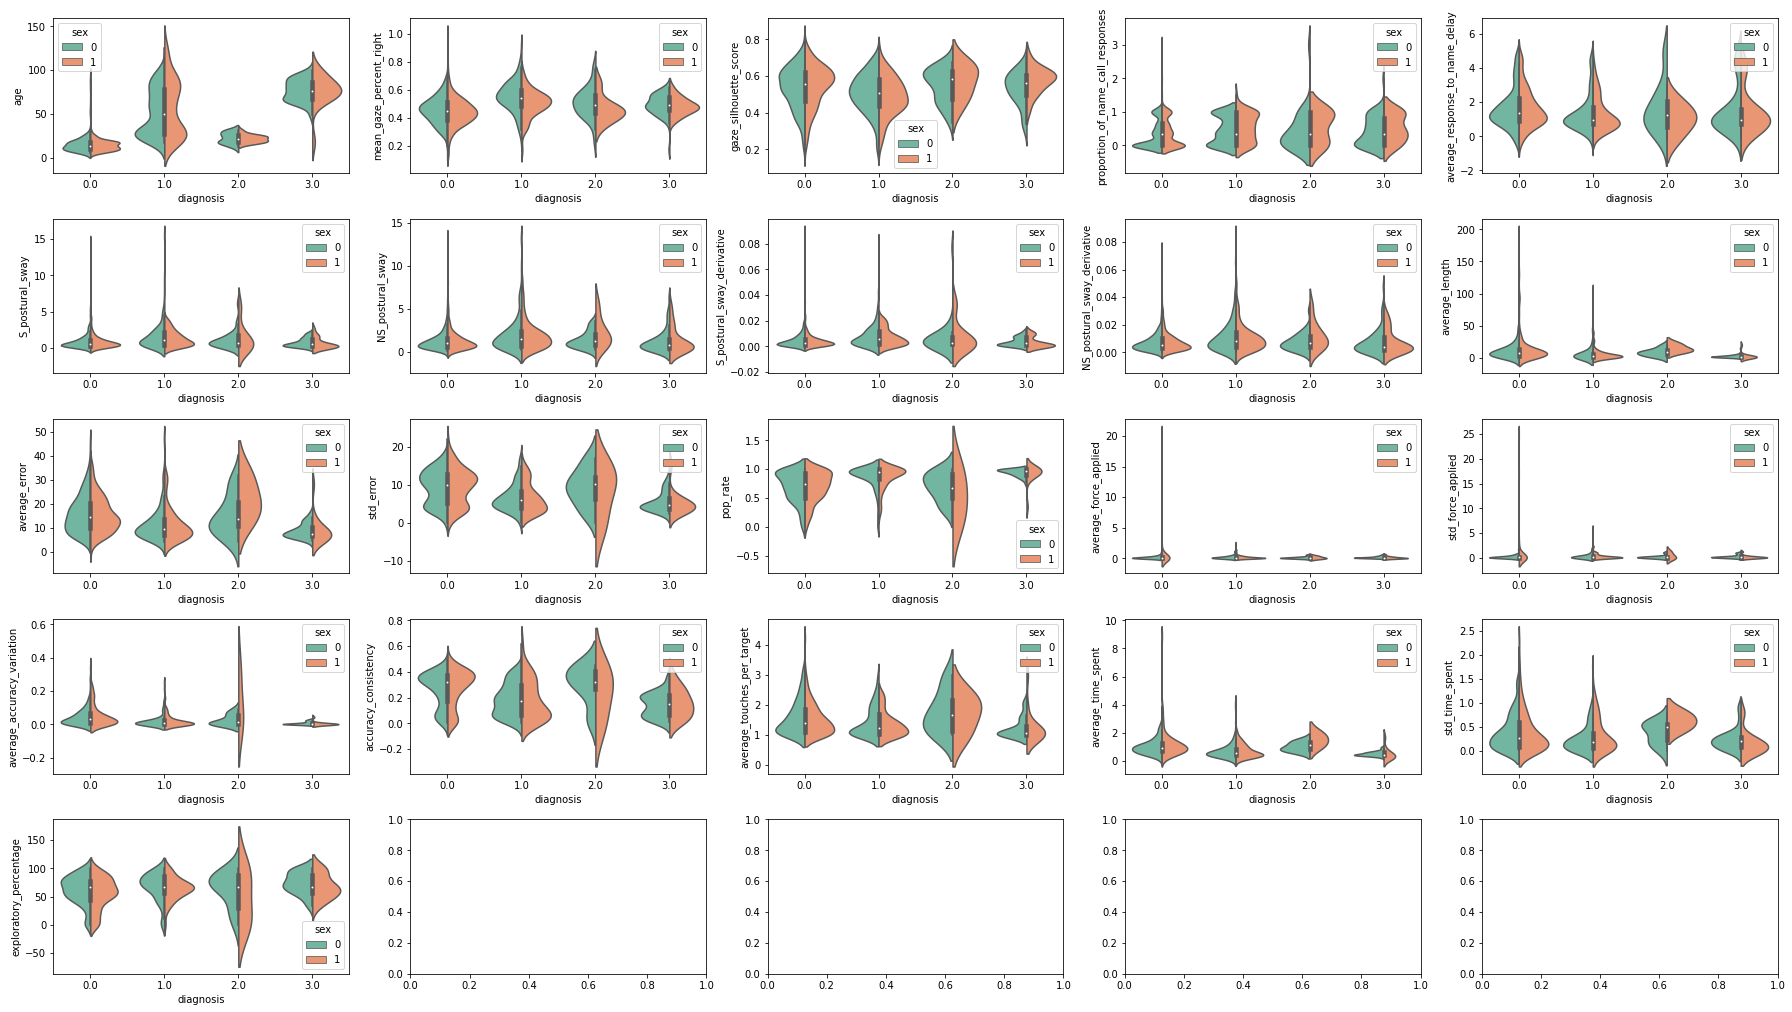

In [129]:
selected_features = ['age'] + data.features_name[:int(len(data.features_name)//2)]

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=5, nrows=len(selected_features)//5 +1, figsize=(25, 14))
# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df, y=col, x='diagnosis', hue='sex', palette="Set2",
                   split=True, ax=ax)
plt.tight_layout()